In [2]:
import numpy as np
import torch 
from model import PINNs
import pandas as pd
from utils import charge_data
import json
import matplotlib.pyplot as plt
from model import PINNs
from utils import charge_data
import json
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import numpy as np
import time as time
import pandas as pd
from constants import DICT_CASE, DICT_Y0, M, PARAM_ADIM
from geometry import RectangleWithoutCylinder

In [3]:
folder = '18_huge_res_net'

In [4]:
hyper_param = {
    "num": [2],
    "case": [1],
    "nb_epoch": 1000,
    "save_rate": 10,
    "dynamic_weights": False,
    "lr_weights": 0.1,
    "weight_data": 0.5,
    "weight_border": 0.5,
    "batch_size": 10000,
    "nb_points_pde": 1000000,
    "lr_init": 3e-4,
    "gamma_scheduler": 0.999,
    "nb_layers": 15,
    "nb_neurons": 64,
    "n_pde_test": 5000,
    "n_data_test": 5000,
    "nb_points": 144,
    "x_min": -0.06,
    "x_max": 0.06,
    "y_min": -0.06,
    "y_max": 0.06,
    "t_min": 6.5,
    "nb_period": 20,
    "u_border": True,
    "v_border": False,
    "p_border": True,
    "r_min": 0.026/2,
    'theta_border_min': 0.1,
    'is_res': True,
    'nb_blocks': 5,  # Pour RNN
    'nb_layer_block': 3  # Pour RNN 
}

hyper_param['H'] = [DICT_CASE[str(k)] for k in hyper_param['case']]
hyper_param['ya0'] = [DICT_Y0[str(k)] for k in hyper_param['num']]
hyper_param['file'] = [
    f"model_{num_}_case_{case_}.csv" for num_, case_ in zip(hyper_param['num'], hyper_param['case'])
    ]
hyper_param['m'] = M

In [6]:
(
    X_train,
    U_train,
    X_full,
    U_full,
    X_border_train,
    X_border_test,
    U_border_train,
    U_border_test,
    mean_std,
    X_pde,
    X_test_pde,
    X_test_data,
    U_test_data,
) = charge_data(hyper_param, PARAM_ADIM)


fichier n°0 chargé
Starting X_train
Simu n°0/1
Time:1.759
X_train OK
X_pde OK


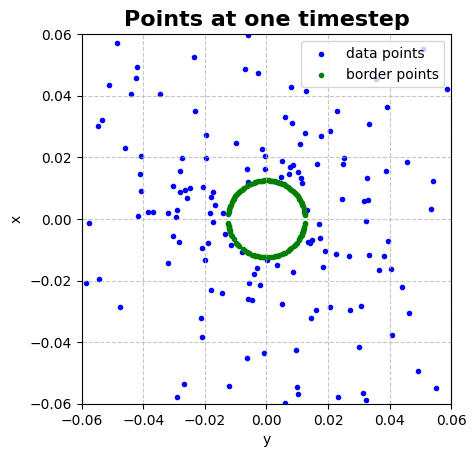

In [7]:
numb = 19
X = X_train.numpy()
X_border = X_border_train.numpy()
masque_border = X_border[:, 2] == np.unique(X[:, 2])[numb]
masque = X[:, 2] == np.unique(X[:, 2])[numb]
x = (X[masque][:, 0]* mean_std['x_std'].item() + mean_std['x_mean'].item()) * PARAM_ADIM['L']
y = (X[masque][:, 1]* mean_std['y_std'].item() + mean_std['y_mean'].item()) * PARAM_ADIM['L']
x_border = (X_border[masque_border][:, 0]* mean_std['x_std'].item() + mean_std['x_mean'].item()) * PARAM_ADIM['L']
y_border = (X_border[masque_border][:, 1]* mean_std['y_std'].item() + mean_std['y_mean'].item()) * PARAM_ADIM['L']
plt.scatter(x, y, marker='.', color='blue', label='data points')
plt.scatter(x_border, y_border, marker='.', color='green', label='border points')
# plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(-0.06, 0.06)
plt.xlim(-0.06, 0.06)

plt.title("Points at one timestep", fontsize=16, fontweight='bold')
plt.xlabel("y")
plt.ylabel("x")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.7)

# Affichage du graphique
plt.savefig('results/' + folder + "/" + 'points.png')

In [52]:
x_border.shape

(116,)

(-0.06, 0.06)

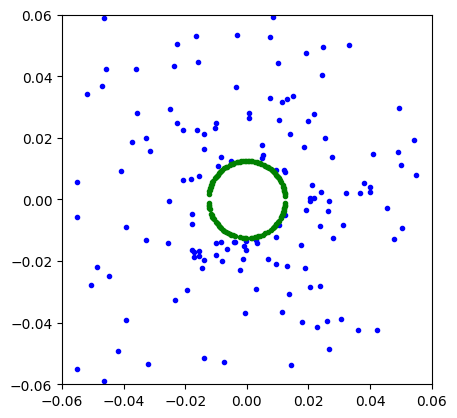

In [41]:
numb = 20
X = X_train.numpy()
X_border = X_border_train.numpy()
masque_border = X_border[:, 2] == np.unique(X[:, 2])[numb]
masque = X[:, 2] == np.unique(X[:, 2])[numb]
x = (X[masque][:, 0]* mean_std['x_std'].item() + mean_std['x_mean'].item()) * PARAM_ADIM['L']
y = (X[masque][:, 1]* mean_std['y_std'].item() + mean_std['y_mean'].item()) * PARAM_ADIM['L']
x_border = (X_border[masque_border][:, 0]* mean_std['x_std'].item() + mean_std['x_mean'].item()) * PARAM_ADIM['L']
y_border = (X_border[masque_border][:, 1]* mean_std['y_std'].item() + mean_std['y_mean'].item()) * PARAM_ADIM['L']
plt.scatter(x, y, marker='.', color='blue')
plt.scatter(x_border, y_border, marker='.', color='green')
# plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')
plt.ylim(-0.06, 0.06)
plt.xlim(-0.06, 0.06)